In [11]:
# image and annotation file list

import os

img_dir = "./datasets/train/origin_images/"
new_img_dir = "./datasets/train/images/"
ann_dir = "./datasets/train/json/"
txt_dir = "./datasets/train/labels/"

imgFiles = os.listdir(img_dir)

In [12]:
# (classes -> int) dictionary

fiber_class = {
    "Cotton" : 0,
    "Hemp" : 1,
    "cellulose fiber Others" : 2,
    "Silk" : 3,
    "Wool" : 4,
    "protein fiber Others" : 5,
    "Viscos rayon" : 6,
    "regenerated fiber Others" : 7,
    "Polyester" : 8,
    "Nylon" : 9,
    "Polyurethane" :10,
    "synthetic fiber Others" : 11
}

'''
color_class = {
    "Black" : 0,
    "White" : 1,
    "Gray" : 2,
    "Red" : 3,
    "Orange" : 4,
    "Pink" : 5,
    "Yellow" : 6,
    "Brown" : 7,
    "Green" : 8,
    "Blue" : 9,
    "Purple" : 10,
    "Beige" : 11,
    "Mixed" : 12
}
'''

washing_method_class = {
    # "Do Not Washing" : 0,
    "Hand Washing30" : 1,
    "Washing30" : 2,
    "Washing40" : 3,
    # "Washing40_1" : 4, -> 3번에 합치기
    "Washing60" : 5,
    "Washing95" : 6
}


drycleaning_class = {
    "DO NOT DRYCLEAN" : 0,
    "DRYCLEAN" : 1,
    "DRYCLEAN : LAUNDRY" : 2,
    #"DRYCLEAN : petroleum solvent only" : 3 -> 1번에 합치기
}

'''
drying_class = {
    "Do not tumble dry" : 0,
    "Drip dry" : 1,
    "Drip dry in shade" : 2,
    "Line dry" : 3,
    "Line dry in shade" : 4,
    "Tumble dry" : 5
}
'''

'\ndrying_class = {\n    "Do not tumble dry" : 0,\n    "Drip dry" : 1,\n    "Drip dry in shade" : 2,\n    "Line dry" : 3,\n    "Line dry in shade" : 4,\n    "Tumble dry" : 5\n}\n'

In [ ]:
washing_method_class = {
    "Hand Washing30" : 0,
    "Washing30" : 1,
    "Washing40" : 2, # "Washing40_1"
    "Washing60" : 3,
    "Washing95" : 4,

    # do not washing or washing method = none인 경우
    "DRYCLEAN" : 5, 
    "DRYCLEAN : LAUNDRY" : 6,
    "DRYCLEAN : petroleum solvent only" : 7 
}

In [13]:
len(imgFiles)

25445

In [16]:
import json

for idx in range(9490,len(imgFiles)):
    print(imgFiles[idx])
    annFile = imgFiles[idx].split(".")[0] + ".json"
    with open(ann_dir + annFile, "r") as f:
        json_data = json.load(f)

    # width, height
    width = json_data["dataset"]["dataset.width"]
    height = json_data["dataset"]["dataset.height"]

    # polygon pts
    if len(json_data["annotation"]) == 0:
        print("annotation error")
        continue
    pts = json_data["annotation"][0]["annotation_point"]
    pts_x = pts[0::2]
    pts_y = pts[1::2]

    # find bbox
    minx = miny = max(width, height)
    maxx = maxy = 0

    for (x, y) in zip(pts_x, pts_y):
        if x < minx: minx = x
        if x > maxx: maxx = x
        if y < miny: miny = y
        if y > maxy: maxy = y

    # convert bbox points to YOLOv8 PyTorch TXT format (center_x, center_y, w, h)
    center_x = (minx + maxx)/2.0
    center_y = (miny + maxy)/2.0
    box_width = maxx - minx
    box_height = maxy - miny
    normalized_center_x = center_x / width
    normalized_center_y = center_y / height
    normalized_box_width = box_width / width
    normalized_box_height = box_height / height

    # label 추출
    fibers = json_data["metadata.clothes"]["metadata.clothes.fiber_composition"].strip().split(",")
    while(len(fibers) < 3):
        fibers.append(fibers[0])
    
    fibers = fibers[:3]
    '''
    fiber = json_data["metadata.clothes"]["metadata.clothes.fiber_composition"].split(",")
    washing_method = json_data["metadata.clothes"]["metadata.clothes.washing_method"].strip()
    drycleaning = json_data["metadata.clothes"]["metadata.clothes.drycleaning"].strip()

    if fiber == "none" or washing_method == "none" or drycleaning == "none":
        # print("'none' skip!")
        continue
    '''
    if fibers[0] == "none":
        continue

    # create class id
    class_id = fiber_class[fibers[0]]
    subClass_id = [fiber_class[fibers[1]], fiber_class[fibers[2]]]
    '''
    subClass_id = []
    if isinstance(fiber, str):
        class_id = 84 * drycleaning_class[drycleaning] + 7 * fiber_class[fiber.strip()] + washing_method_class[washing_method]
    else:
        class_id = 84 * drycleaning_class[drycleaning] + 7 * fiber_class[fiber[0].strip()] + washing_method_class[washing_method]
        for subFiber in fiber[1:]:
            subClass_id.append(84 * drycleaning_class[drycleaning] + 7 * fiber_class[subFiber.strip()] + washing_method_class[washing_method])
    '''
    # create .txt file
    f = open(txt_dir + "{}.txt".format(idx), "w+")
    f.write(str(class_id) + " " + str(normalized_center_x) + " " + str(normalized_center_y) + " " + str(normalized_box_width) + " " + str(normalized_box_height))
    for subClass in subClass_id:
        f.write(" " + str(subClass))
    f.write("\n")
    f.close()

    # rename img file
    os.rename(img_dir + imgFiles[idx], new_img_dir + "{}.jpg".format(idx))
        

01_sou_060379_301892_back_02top_04shirt_woman.jpg
01_sou_060379_301893_wear_02top_04shirt_woman.jpg
01_sou_060379_301894_wear_02top_04shirt_woman.jpg
01_sou_060379_301895_wear_02top_04shirt_woman.jpg
01_sou_060380_301897_back_02top_04shirt_man.jpg
01_sou_060380_301898_wear_02top_04shirt_man.jpg
01_sou_060380_301899_wear_02top_04shirt_man.jpg
01_sou_060380_301900_wear_02top_04shirt_man.jpg
01_sou_060381_301901_front_02top_04shirt_woman.jpg
01_sou_060381_301902_back_02top_04shirt_woman.jpg
01_sou_060381_301903_wear_02top_04shirt_woman.jpg
01_sou_060381_301904_wear_02top_04shirt_woman.jpg
01_sou_060381_301905_wear_02top_04shirt_woman.jpg
01_sou_060382_301906_front_02top_04shirt_woman.jpg
01_sou_060382_301907_back_02top_04shirt_woman.jpg
01_sou_060382_301908_wear_02top_04shirt_woman.jpg
01_sou_060382_301909_wear_02top_04shirt_woman.jpg
01_sou_060383_301913_wear_02top_04shirt_man.jpg
01_sou_060383_301914_wear_02top_04shirt_man.jpg
01_sou_060383_301915_wear_02top_04shirt_man.jpg
01_sou_06038

# BBOX 시각화

In [4]:
img_idx = 1000
img_path = "./datasets/train/images/"
ann_path = "./datasets/train/labels/"
img_file = img_path + str(img_idx) + ".jpg"
ann_file = ann_path + str(img_idx) + ".txt"

In [5]:
# (int -> class) dictionary

fiber_class = {
    0 :"Cotton",
    1 : "Hemp",
    2 : "cellulose fiber Others",
    3 : "Silk",
    4 : "Wool",
    5 : "protein fiber Others",
    6 : "Viscos rayon",
    7 : "regenerated fiber Others",
    8 : "Polyester",
    9 : "Nylon",
    10 : "Polyurethane",
    11 : "synthetic fiber Others"
}


washing_method_class = {
    0 : "Do Not Washing",
    1 : "Hand Washing30",
    2 : "Washing30",
    3 : "Washing40",
    4 : "Washing40_1",
    5 : "Washing60",
    6 :"Washing95"
}


drycleaning_class = {
    0 : "DO NOT DRYCLEAN",
    1 : "DRYCLEAN",
    2 : "DRYCLEAN : LAUNDRY",
    3 : "DRYCLEAN : petroleum solvent only"
}


['Cotton', 'Polyester', 'Cotton'] Cotton/Polyester/Cotton


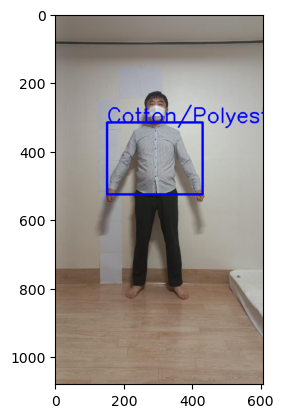

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(img_file)
h, w, c = img.shape

f = open(ann_file, "r")
lines = f.readlines()

for line in lines:
    '''
    arr = line.split(" ")
    class_id = int(arr[0])
    dry = drycleaning_class[class_id//84]
    fiber = fiber_class[class_id/84//7]
    washing = washing_method_class[class_id%7]

    label = fiber + "/" + dry + "/" + washing
    '''
    arr = line.split(" ")
    class_id = []
    class_id.append(fiber_class[int(arr[0])])
    class_id.append(fiber_class[int(arr[5])])
    class_id.append(fiber_class[int(arr[6])])
    label = class_id[0] + "/" + class_id[1] + "/" + class_id[2]
    box_x = int((float(arr[1]) - float(arr[3])/2) * w)
    box_y = int((float(arr[2]) - float(arr[4])/2) * h)
    box_w = int(float(arr[3]) * w)
    box_h = int(float(arr[4]) * h)

    print(class_id, label)
    cv2.putText(img, label, (box_x, box_y),cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 5)
    cv2.rectangle(img, (box_x, box_y), (box_x + box_w, box_y + box_h),(255,0,0), 5 )


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 
    

f.close()

In [4]:
arr = []
for idx in range(336):
    dry = drycleaning_class[idx//84]
    fiber = fiber_class[idx%84//7]
    washing = washing_method_class[idx%7]
    label = fiber + "/" + dry + "/" + washing
    arr.append(label)

In [5]:
arr

['Cotton/DO NOT DRYCLEAN/Do Not Washing',
 'Cotton/DO NOT DRYCLEAN/Hand Washing30',
 'Cotton/DO NOT DRYCLEAN/Washing30',
 'Cotton/DO NOT DRYCLEAN/Washing40',
 'Cotton/DO NOT DRYCLEAN/Washing40_1',
 'Cotton/DO NOT DRYCLEAN/Washing60',
 'Cotton/DO NOT DRYCLEAN/Washing95',
 'Hemp/DO NOT DRYCLEAN/Do Not Washing',
 'Hemp/DO NOT DRYCLEAN/Hand Washing30',
 'Hemp/DO NOT DRYCLEAN/Washing30',
 'Hemp/DO NOT DRYCLEAN/Washing40',
 'Hemp/DO NOT DRYCLEAN/Washing40_1',
 'Hemp/DO NOT DRYCLEAN/Washing60',
 'Hemp/DO NOT DRYCLEAN/Washing95',
 'cellulose fiber Others/DO NOT DRYCLEAN/Do Not Washing',
 'cellulose fiber Others/DO NOT DRYCLEAN/Hand Washing30',
 'cellulose fiber Others/DO NOT DRYCLEAN/Washing30',
 'cellulose fiber Others/DO NOT DRYCLEAN/Washing40',
 'cellulose fiber Others/DO NOT DRYCLEAN/Washing40_1',
 'cellulose fiber Others/DO NOT DRYCLEAN/Washing60',
 'cellulose fiber Others/DO NOT DRYCLEAN/Washing95',
 'Silk/DO NOT DRYCLEAN/Do Not Washing',
 'Silk/DO NOT DRYCLEAN/Hand Washing30',
 'Silk/DO